In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('/content/Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [142]:
# Menghapus kolom
df.drop(columns=['name'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


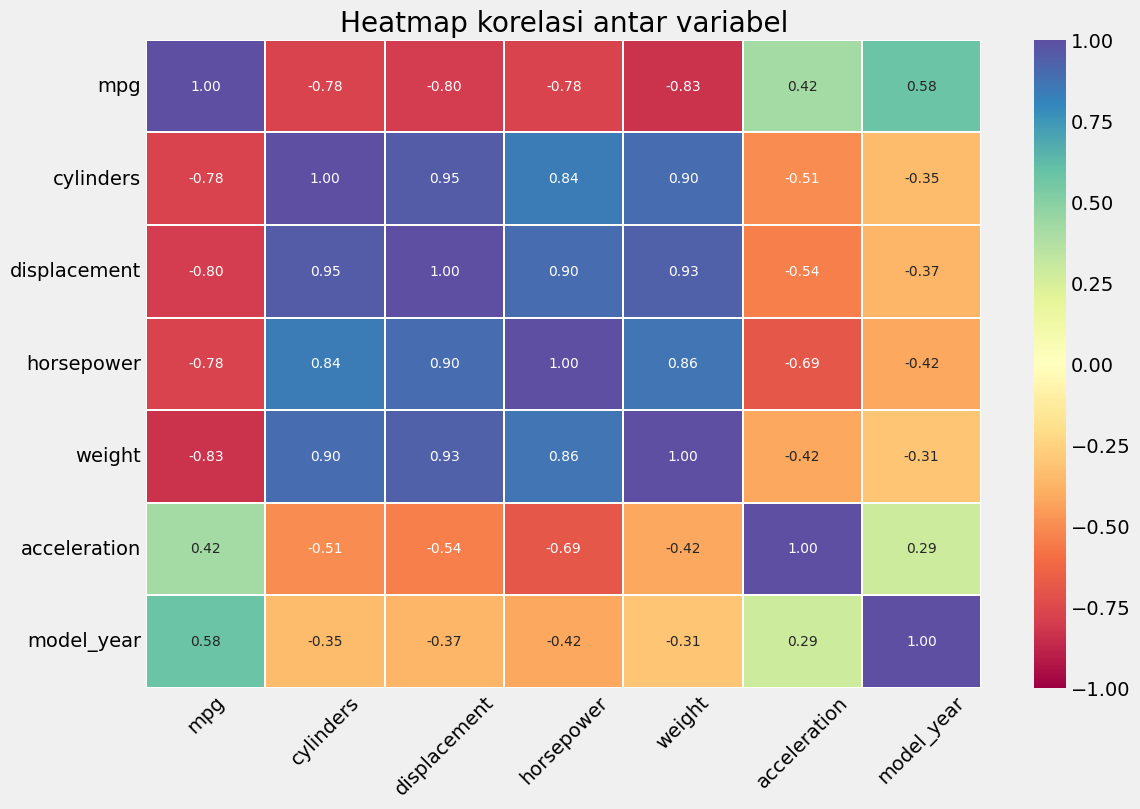

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung matriks korelasi
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    vmin=-1,
    vmax=1,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    linewidths=0.1,
    annot_kws={"size": 10}
)
plt.xticks(rotation=45)
plt.title("Heatmap korelasi antar variabel")
plt.show()

interpretasi:

1. Korelasi Positif dan Negatif:
- Korelasi positif: Nilai mendekati +1 menunjukkan hubungan kuat dan searah antar variabel. Contohnya: Cylinders dan Displacement memiliki korelasi sangat tinggi (0.95).Horsepower dan Weight memiliki korelasi kuat (0.86).
- Korelasi negatif: Nilai mendekati -1 menunjukkan hubungan kuat tetapi berlawanan arah. Contohnya: MPG dan Weight memiliki korelasi negatif kuat (-0.83). MPG dan Cylinders (-0.78).

2. Korelasi Kuat:
- Korelasi positif antara Cylinders dengan Displacement menunjukkan bahwa semakin banyak jumlah silinder, kapasitas mesin (displacement) cenderung meningkat.
- Korelasi negatif antara MPG (miles per gallon) dan Weight menunjukkan bahwa mobil yang lebih berat cenderung memiliki efisiensi bahan bakar lebih rendah.

3. Hubungan Lemah:
- Hubungan antara Acceleration dan variabel lain seperti Cylinders (-0.51) atau Displacement (-0.54) menunjukkan korelasi moderat hingga rendah.

4. Model Year:
- Variabel Model Year memiliki korelasi positif sedang dengan MPG (0.58), menunjukkan bahwa mobil yang lebih baru cenderung lebih hemat bahan bakar.
- Korelasi negatif antara Model Year dengan Weight (-0.31) menunjukkan bahwa mobil yang lebih baru cenderung lebih ringan.


In [144]:
df.rename(columns = {"cylinders" : "x1", "displacement" : "x2", "horsepower" : "x3", "weight" : "x4", "acceleration" : "x5", "model_year" : "x6", "origin" : "x7", "mpg" : "y"}, inplace = True)
df.head()

,y,x1,x2,x3,x4,x5,x6,x7
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [145]:
import pandas as pd
import statsmodels.formula.api as smf

# Pastikan dataset sudah bersih tanpa kolom yang tidak relevan (contohnya 'name')
# dan kolom kategoris sudah diubah menjadi dummy variables

# Mengimpor dataset (ganti 'data.csv' dengan file dataset Anda)
data = pd.read_csv('Automobile.csv')

# Pastikan kolom 'origin' menjadi dummy variables jika diperlukan
data_cleaned = pd.get_dummies(data.drop(columns=['name']), drop_first=True)

# Define formula dinamically (semua kolom kecuali 'mpg' dianggap sebagai prediktor)
independent_vars = " + ".join(data_cleaned.columns.drop('mpg'))  # Semua variabel kecuali target 'mpg'
formula = f'mpg ~ {independent_vars}'

# Fit model regresi menggunakan Ordinary Least Squares (OLS)
model = smf.ols(formula=formula, data=data_cleaned).fit()

# Menampilkan ringkasan regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.79e-139
Time:                        14:53:32   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -15.3246 

**Model Regresi yang didapat Y = -15.3246 - 0.4897(x1) + 0.0240(x2) - 0.0182(x3) - 0.0067(x4) + 0.0791(x5) + 0.7770(x6) dengan origin(x7) usa dan japan + 0.2232 - 2.6300**


In [146]:
# Korelasi Pearson
from scipy.stats import pearsonr

list1 = df['x1']
list2 = df['y']
corr,_= pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.775


In [147]:
# Korelasi Pearson
from scipy.stats import pearsonr

list1 = df['x2']
list2 = df['y']
corr,_= pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.804


In [148]:
# Korelasi Pearson
from scipy.stats import pearsonr
import numpy as np

list1 = df['x3']
list2 = df['y']

# Remove infs and NaNs from both lists
list1 = list1[np.isfinite(list1)]
list2 = list2[np.isfinite(list2)]

# Ensure both lists have the same length after removing infs/NaNs
min_len = min(len(list1), len(list2))
list1 = list1[:min_len]
list2 = list2[:min_len]

corr,_= pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.571


In [149]:
# Korelasi Pearson
from scipy.stats import pearsonr

list1 = df['x4']
list2 = df['y']
corr,_= pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.832


In [150]:
# Korelasi Pearson
from scipy.stats import pearsonr

list1 = df['x5']
list2 = df['y']
corr,_= pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.420


In [151]:
# Korelasi Pearson
from scipy.stats import pearsonr

list1 = df['x6']
list2 = df['y']
corr,_= pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.579


In [152]:
# Define x as the independent variables from your dataset
x = data_cleaned.drop(columns=['mpg']) # Drop the target variable 'mpg' since it's not an input for prediction

# Membentuk nilai prediksi
prediksi = model.predict(x)
print(prediksi.head())

0    14.953252
1    14.040098
2    15.230551
3    14.994084
4    14.901941
dtype: float64


In [153]:
# Membentuk nilai residual
residual = model.resid
print(residual.head())

0    3.046748
1    0.959902
2    2.769449
3    1.005916
4    2.098059
dtype: float64


In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

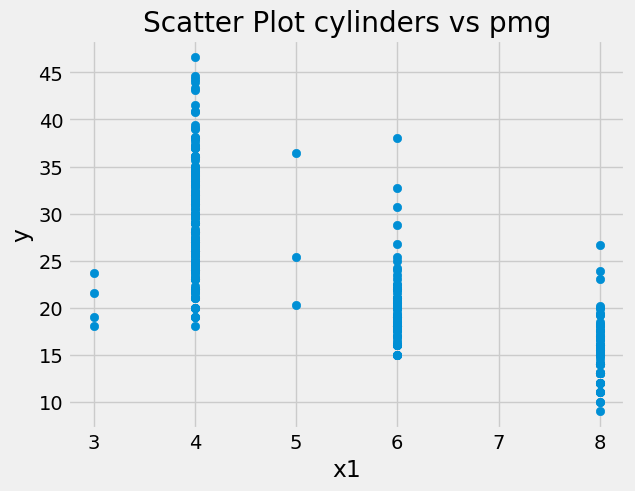

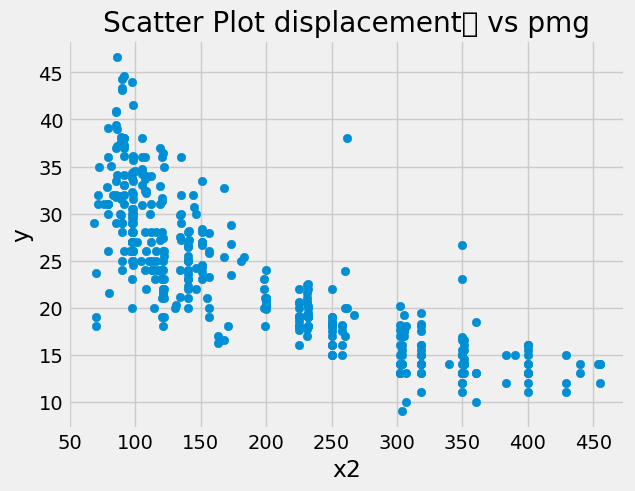

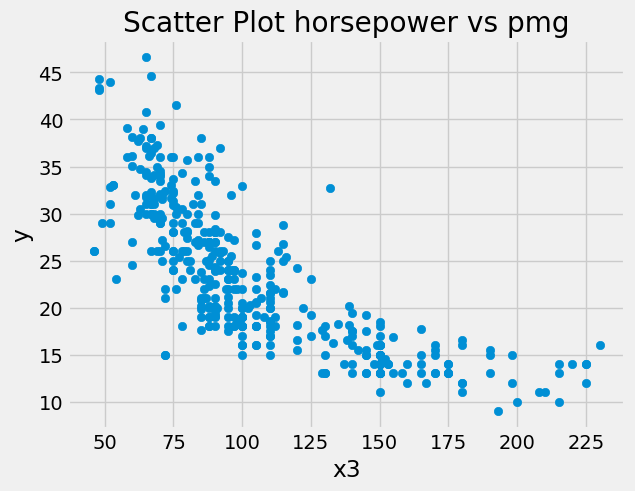

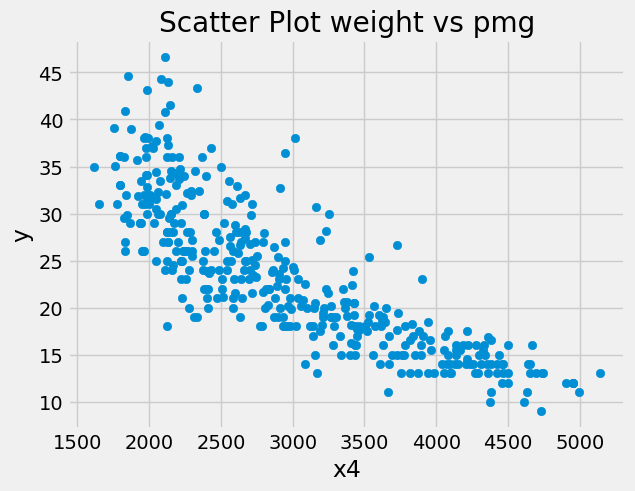

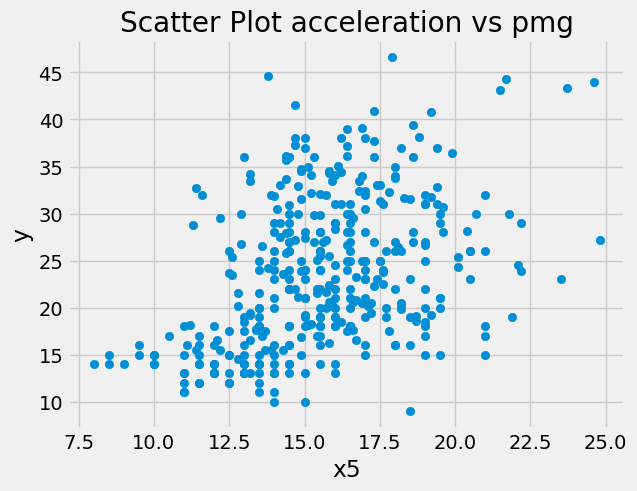

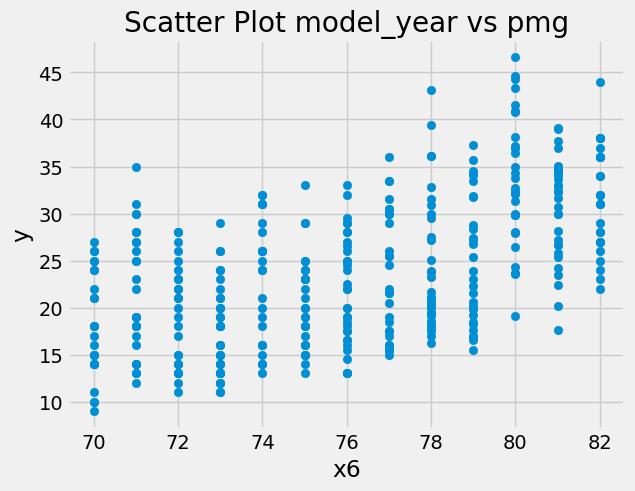

In [155]:
plt.scatter(df['x1'], df['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Scatter Plot cylinders vs pmg')
plt.show()

plt.scatter(df['x2'], df['y'])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Scatter Plot displacement	 vs pmg')
plt.show()

plt.scatter(df['x3'], df['y'])
plt.xlabel('x3')
plt.ylabel('y')
plt.title('Scatter Plot horsepower vs pmg')
plt.show()

plt.scatter(df['x4'], df['y'])
plt.xlabel('x4')
plt.ylabel('y')
plt.title('Scatter Plot weight vs pmg')
plt.show()

plt.scatter(df['x5'], df['y'])
plt.xlabel('x5')
plt.ylabel('y')
plt.title('Scatter Plot acceleration vs pmg')
plt.show()

plt.scatter(df['x6'], df['y'])
plt.xlabel('x6')
plt.ylabel('y')
plt.title('Scatter Plot model_year vs pmg')
plt.show()


# UJI F

In [156]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f

# Mendefinisikan Hipotesis
# h0 = 'B1 = B2 = 0, tidak terdapat pengaruh signifikan secara serentak variabel independen berpengaruh terhadap variabel dependen'
# h1 = 'Minimal ada 1 bj ≠ 0, terdapat pengaruh signifikan secara serentak variabel independen berpengaruh terhadap variabel dependen'

# Menentukan alfa
alfa = 0.05

# Definisikan variabel dependen dan independen
# Change this line to use the actual column names from your DataFrame
x = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]  # Variabel independen
y = data['mpg']  # Variabel dependen #change this to 'mpg' assuming it's your target variable #Fixed: Renamed y1 to y

# Menambahkan konstanta (intercept) pada variabel independen
x = sm.add_constant(x)

# Handle missing or infinite values in 'x'
# You can choose to either drop rows with missing/infinite values or impute them.
# Dropping rows with missing/infinite values:
x = x.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and then drop rows with NaNs
y = y[x.index]  # Update 'y' to match the remaining rows in 'x'

# Alternatively, you can impute missing values using the mean:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# x = imputer.fit_transform(x)


# Menyusun model OLS
model = sm.OLS(y, x).fit()

# F-statistic dan derajat bebas
fhitung = model.fvalue  # F-statistik dari model
df1 = x.shape[1] - 1  # Derajat bebas pembilang (jumlah variabel independen)
df2 = x.shape[0] - df1 - 1  # Derajat bebas penyebut (jumlah sampel - jumlah variabel - 1)

# Menghitung F-tabel
ftabel = f.ppf(1 - alfa, df1, df2)

# Output hasil
print('Nilai F tabel:', ftabel)
print('Nilai F hitung :', fhitung)

# menentukan titik kritis pengujian
if fhitung > ftabel:
    print("Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")
else:
    print("Karena F-hitung < F-tabel, maka H0 gagal ditolak. Artinya, tidak ada variabel independen yang berpengaruh signifikan terhadap variabel dependennya.")

Nilai F tabel: 2.1221371769660387
Nilai F hitung : 272.23409822574575
Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


# Uji F
1. Menentukan hipotesis

*   H0 : Beta1 = Beta2 = 0
*   H1 : minimal ada satu Betaj yang tidak sama dengan 0, dimana j = 1, 2

2. Menentukan tingkat signifikansi
  
  Tingkat signifikansi sebesar 5% atau 0,05

3. Menentukan Uji statisti F

  Pada Hasil perhitungan diatas, didapatkan Nilai P-value sebesar **272.23**

4. Menentukan titik kritis pengujian

  Dengan alpha sebesar 0,05, H0 ditolak jika Fhit > Ftabel dimana F tabel = 2.12 = atau p-Value < 0.05

5. Menentukan Kesimpulan

  Dengan alpha sebesar 0,05, nilai Fhit = 272.23 > Ftabel = 2.01 berdasarkan hal itu maka dapat disimpulkan bahwa *H0 ditolak* yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel independennya.

# UJI R-SQUARED

In [157]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
# Changed column names to match the ones in 'data' DataFrame
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]  # Variabel independen
y = df['mpg']  # Variabel dependen #Fixed: Assuming 'mpg' is your target variable

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Handle missing or infinite values in 'X'
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and then drop rows with NaNs
y = y[X.index]  # Update 'y' to match the remaining rows in 'X'

# Membuat model OLS
# Fixed: Changed y1 to y to match the target variable
model = sm.OLS(y, X).fit()

# Koefisien regresi dan prediksi
b0, b1, b2, b3, b4, b5, b6 = model.params
y_pred = model.predict(X)

# Menghitung SST (Total Sum of Squares)
# Fixed: Changed y1 to y to match the target variable
mean_y = np.mean(y)
sst = np.sum((y - mean_y) ** 2)

# Menghitung SSR (Regression Sum of Squares)
ssr = np.sum((y_pred - mean_y) ** 2)

# Menghitung SSE (Residual Sum of Squares)
# Fixed: Changed y1 to y to match the target variable
sse = np.sum((y - y_pred) ** 2)

# Menghitung R-squared (Koefisien Determinasi)
r_squared = model.rsquared

# Output
print(f"Nilai SST (Total Sum of Squares): {sst}")
print(f"Nilai SSR (Regression Sum of Squares): {ssr}")
print(f"Nilai SSE (Residual Sum of Squares): {sse}")
print(f"Koefisien Determinasi (R-squared): {r_squared}")

Nilai SST (Total Sum of Squares): 23818.99346938776
Nilai SSR (Regression Sum of Squares): 19275.646444673024
Nilai SSE (Residual Sum of Squares): 4543.347024714769
Koefisien Determinasi (R-squared): 0.8092552890383932


interpretasi R-squared:

Nilai R-squared tinggi,model ini memiliki ketepatan yang baik dalam memprediksi variabel dependen

In [158]:
adjusted_r_squared = model.rsquared_adj
print(f"R-Squared Adjusted : {adjusted_r_squared}")
print(f'\nArtinya sekitar {adjusted_r_squared*100}% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya yaitu.\nsementara sisanya {(1-adjusted_r_squared)*100}% dipengaruhi oleh variabel yang tidak diketahui')

R-Squared Adjusted : 0.8062826441922383

Artinya sekitar 80.62826441922383% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya yaitu.
sementara sisanya 19.37173558077617% dipengaruhi oleh variabel yang tidak diketahui


# UJI Z

In [159]:
import pandas as pd
import scipy.stats as stats

# Pengujian Hipotesis
# Hipotesis Nol (H₀): Rata-rata suatu variabel sama dengan nilai tertentu
# Hipotesis Alternatif (H₁): Rata-rata suatu variabel berbeda dari nilai tersebut.

# Menentukan kolom numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Kolom numerik dalam dataset: {list(numeric_columns)}")

# Menentukan nilai hipotesis (H₀: rata-rata variabel = mu)
mu = 50  # Hipotesis rata-rata (sesuaikan jika diperlukan)
alpha = 0.05  # Tingkat signifikansi

# Nilai z-tabel untuk uji dua sisi pada tingkat signifikansi alpha
z_tabel = stats.norm.ppf(1 - alpha / 2)

# 2. Iterasi untuk menguji semua variabel numerik
results = []

for col in numeric_columns:
    # Rata-rata dan standar deviasi sampel
    sample_mean = df[col].mean()
    sample_std = df[col].std()
    n = len(df[col])

    # Menghitung z-statistik
    z_stat = (sample_mean - mu) / (sample_std / (n ** 0.5))

    # Menghitung nilai p
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Uji dua sisi

    # Keputusan menggunakan z-tabel
    decision = "H₀ ditolak" if abs(z_stat) > z_tabel else "H₀ gagal ditolak"

    # Menyimpan hasil
    results.append({
        'Variabel': col,
        'Rata-rata Sampel': round(sample_mean, 2),
        'Z-Statistik': round(z_stat, 3),
        'Z-Tabel': round(z_tabel, 3),
        'P-Value': round(p_value, 5),
        'Keputusan': decision
    })

# 3. Menampilkan hasil secara ringkas
print("\nHasil Pengujian Hipotesis (dengan Z-Tabel):")
for result in results:
    print(
        f"Variabel: {result['Variabel']}, Z-Statistik: {result['Z-Statistik']}, "
        f"Z-Tabel: {result['Z-Tabel']}, P-Value: {result['P-Value']}, Keputusan: {result['Keputusan']}"
    )


Kolom numerik dalam dataset: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

Hasil Pengujian Hipotesis (dengan Z-Tabel):
Variabel: mpg, Z-Statistik: -67.603, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: cylinders, Z-Statistik: -522.441, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: displacement, Z-Statistik: 27.442, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: horsepower, Z-Statistik: 28.231, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: weight, Z-Statistik: 68.799, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: acceleration, Z-Statistik: -249.091, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: model_year, Z-Statistik: 140.333, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak


interpretasi:

1. mpg

- Rata-rata Sampel: 23.51
- Z-Statistik: -67.603
- P-Value: 0.0
- Keputusan: H₀ ditolak
-Rata-rata konsumsi bahan bakar (mpg) dalam dataset adalah 23.51, yang secara signifikan lebih rendah dari nilai hipotesis 50. Dengan p-value mendekati nol, kita menolak hipotesis nol dan menyimpulkan bahwa rata-rata mpg dalam dataset ini berbeda secara signifikan dari 50

2. cylinders
- Rata-rata Sampel: 5.45
- Z-Statistik: -522.441
- P-Value: 0.0
- Keputusan: H₀ ditolak.
- Rata-rata jumlah silinder pada mobil dalam dataset adalah 5.45, yang secara signifikan lebih kecil daripada nilai hipotesis 50. P-value sangat kecil, sehingga kita menolak hipotesis nol. Artinya, rata-rata jumlah silinder jauh berbeda dari 50.

3. displacement
- Rata-rata Sampel: 193.43
- Z-Statistik: 27.442
- P-Value: 0.0
Keputusan: H₀ ditolak.
- Rata-rata kapasitas mesin dalam dataset adalah 193.43, yang secara signifikan lebih besar daripada nilai hipotesis 50. Dengan p-value mendekati nol, hipotesis nol ditolak, menunjukkan bahwa rata-rata kapasitas mesin berbeda secara signifikan dari 50.

4. horsepower
- Rata-rata Sampel: 104.47
- Z-Statistik: 28.231
- P-Value: 0.0
- Keputusan: H₀ ditolak.
- Rata-rata tenaga kuda dalam dataset adalah 104.47, yang jauh lebih besar dari nilai hipotesis 50. P-value menunjukkan bahwa perbedaan ini sangat signifikan, sehingga hipotesis nol ditolak.

5.  weight
- Rata-rata Sampel: 2970.42
- Z-Statistik: 68.799
- P-Value: 0.0
- Keputusan: H₀ ditolak.
- Rata-rata berat kendaraan dalam dataset adalah 2970.42, yang jauh lebih besar dari nilai hipotesis 50. Perbedaan ini sangat signifikan secara statistik (p-value mendekati nol), sehingga hipotesis nol ditolak.

6. acceleration
- Rata-rata Sampel: 15.57
- Z-Statistik: -249.091
- P-Value: 0.0
- Keputusan: H₀ ditolak.
- Rata-rata percepatan kendaraan adalah 15.57, yang secara signifikan lebih kecil daripada nilai hipotesis 50. Dengan p-value mendekati nol, kita menolak hipotesis nol dan menyimpulkan bahwa rata-rata percepatan dalam dataset ini berbeda secara signifikan dari 50.

7. model_year
- Rata-rata Sampel: 76.01
- Z-Statistik: 140.333
- P-Value: 0.0
- Keputusan: H₀ ditolak.
- Rata-rata tahun model dalam dataset adalah 76.01, yang secara signifikan lebih besar daripada nilai hipotesis 50. P-value sangat kecil, sehingga kita menolak hipotesis nol dan menyimpulkan bahwa rata-rata tahun model berbeda secara signifikan dari 50.



# UJI T

In [160]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = data['mpg']

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Handle missing or infinite values in 'X'
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and then drop rows with NaNs
y = y[X.index]  # Update 'y' to match the remaining rows in 'X'


# Membuat model OLS
# Fixed: Changed y1 to y to match the target variable
model = sm.OLS(y, X).fit()

# Mengambil t-statistik dan koefisien
t_stats = model.tvalues
p_values = model.pvalues

# Menampilkan hasil uji t untuk setiap koefisien
print("\nUji T untuk setiap koefisien:")
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    print(f"Koefisien {var}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung t-tabel untuk dua sisi (uji dua sisi)
n = len(df)  # Jumlah data
df1 = n - X.shape[1]  # Derajat bebas (n - k - 1)

# Menghitung t-tabel
t_tabel = stats.t.ppf(1 - alpha / 2, df1)
print(f"\nNilai t-tabel : {t_tabel:.4f}")

# Menentukan keputusan untuk setiap koefisien berdasarkan t-hitung dan t-tabel
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    if abs(t_stat) > t_tabel:
        print(f"Tolak H0 untuk koefisien {var}, terdapat pengaruh signifikan.")
    else:
        print(f"Gagal tolak H0 untuk koefisien {var}, tidak terdapat pengaruh signifikan.")


Uji T untuk setiap koefisien:
Koefisien const: t-statistic = -3.0511, p-value = 0.0024
Koefisien cylinders: t-statistic = -0.9932, p-value = 0.3212
Koefisien displacement: t-statistic = 1.0436, p-value = 0.2973
Koefisien horsepower: t-statistic = -0.0283, p-value = 0.9775
Koefisien weight: t-statistic = -10.1409, p-value = 0.0000
Koefisien acceleration: t-statistic = 0.8357, p-value = 0.4038
Koefisien model_year: t-statistic = 14.3176, p-value = 0.0000

Nilai t-tabel : 1.9660
Tolak H0 untuk koefisien const, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien cylinders, tidak terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien displacement, tidak terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien horsepower, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefisien weight, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien acceleration, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefisien model_year, terdapat pengaruh signifikan.


Uji t

1. Menentukan hipotesis

*   H0 : Beta1 = 0
*   H1 : Beta1 tidak sama dengan 0

2. Menentukan tingkat signifikansi

  Tingkat signifikansinya 5% atau alpha sebesar 0.05

3. Menghitung uji z

* Koefisien const: t-statistik = -3.0511
* Koefisien cylinders: t-statistic = -0.9932
* Koefisien displacement: t-statistic = 1.0436
* Koefisien horsepower: t-statistic = -0.0283
* Koefisien weight: t-statistic = -10.1409
* Koefisien acceleration: t-statistic = 0.8357
* Koefisien model_year: t-statistic = 14.3176

4. Menentukan titik kritis pengujian

* Koefisien const: t-statistik = -3.0511, p-value = 0.0024 -> Tolak H0 (signifikan)
* Koefisien cylinders: t-statistic = -0.9932, p-value = 0.3212 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien displacement: t-statistic = 1.0436, p-value = 0.2973 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien horsepower: t-statistic = -0.0283, p-value = 0.9775 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien weight: t-statistic = -10.1409, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien acceleration: t-statistic = 0.8357, p-value =0.4038 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien model_year: t-statistic = 14.3176, p-value = 0.2232 -> Tolak H0 ( signifikan)



5. Kesimpulan

* H0 ditolak pada cylinders yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (mpg)
* H0 gagal ditolak pada displacement yang berarti variabel tidak memiliki pengaruh signifikan terhadap variabel dependen (mpg)
* H0 gagal ditolak pada horse power yang berarti variabeltidak memiliki pengaruh signifikan terhadap variabel dependen (mpg)
* H0 ditolak pada acceleration yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(mpg)
* H0 ditolak pada  model_year yang berarti variabel  memiliki pengaruh yang signifikan terhadap variabel dependen(mpg)





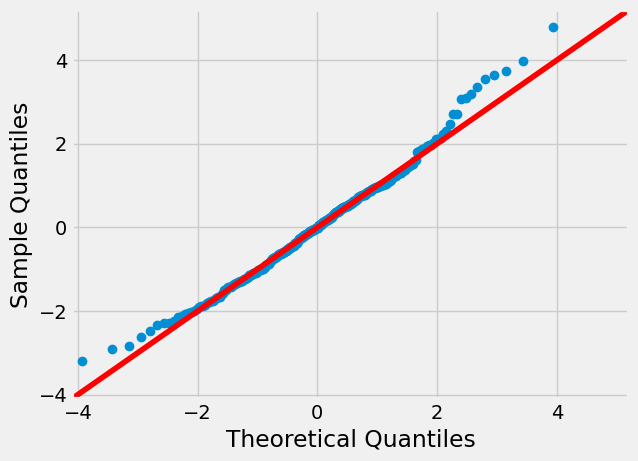

In [161]:
import scipy.stats as stats
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

interpretasi:

- Titik-titik mengikuti garis merah: Sebagian besar data mengikuti garis referensi dengan baik, menunjukkan bahwa distribusi sampel mirip dengan distribusi normal.

- Penyimpangan di ujung (ekor): Pada bagian ekor (titik-titik di bagian atas dan bawah), terdapat sedikit penyimpangan dari garis merah. Ini menunjukkan kemungkinan adanya outlier atau deviasi kecil dari normalitas di ekor distribusi.

Distribusi sampel secara umum mendekati distribusi normal, tetapi ada penyimpangan kecil pada ekor distribusi.

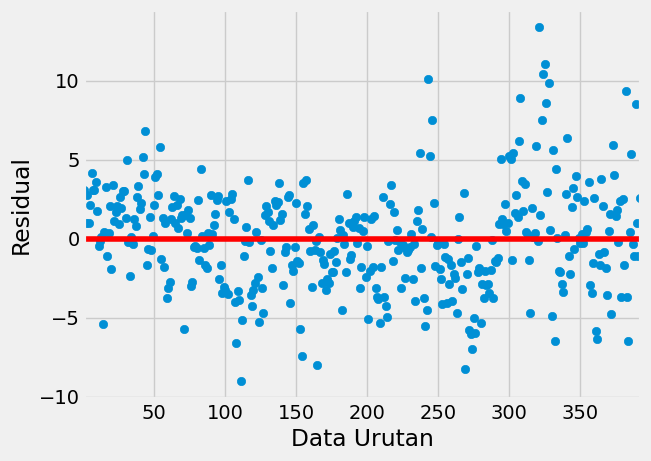

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# memeriksa asumsi residual tidak terjadi autokorelasi
n_residuals = len(residual)
urutan_pengamatan = pd.Series(range(1, n_residuals + 1))

plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('Data Urutan')
plt.ylabel('Residual')
plt.xlim(1, n_residuals + 1)
plt.show()

In [163]:
# Durbin Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
print(f"Durbin-Watson : {dw}")

if dw < 1.5:
    print("Ada indikasi autokorelasi positif")
elif dw > 2.5:
    print("Ada indikasi autokorelasi negatif")
else:
    print("Tidak ada indikasi autokorelasi yang signifikan")


Durbin-Watson : 1.291374322006066
Ada indikasi autokorelasi positif


Durbin-Watson: 2.2849976037296655
Tidak ada indikasi autokorelasi yang signifikan


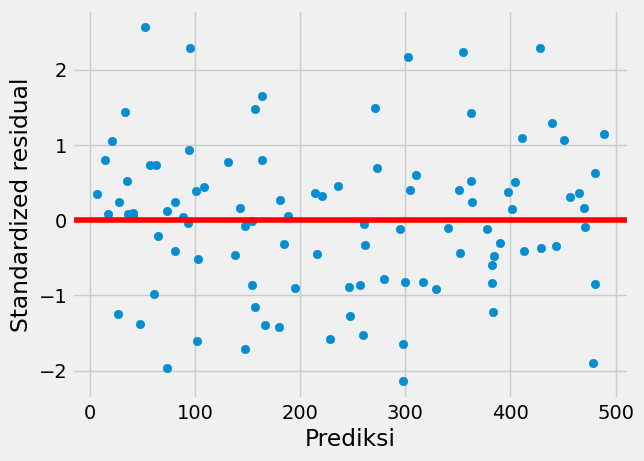

Lagrange multiplier statistic: 0.013836468568617644
p-value: 0.9063620066280806
f-value: 0.013561615645935015
f p-value: 0.9075307766878045


In [169]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.api import het_breuschpagan

# Contoh data
np.random.seed(42)
X = np.random.rand(100, 1) * 100
y = 5 * X.squeeze() + np.random.randn(100) * 20

# Tambahkan konstanta untuk OLS
X_const = add_constant(X)

# Fit model
model = OLS(y, X_const).fit()

# Residual
residual = model.resid

# Durbin-Watson Test
dw = durbin_watson(residual)
print(f"Durbin-Watson: {dw}")
if dw < 1.5:
    print("Ada indikasi autokorelasi positif")
elif dw > 2.5:
    print("Ada indikasi autokorelasi negatif")
else:
    print("Tidak ada indikasi autokorelasi yang signifikan")

# Scatter Plot untuk heteroskedastisitas
residual_std = model.get_influence().resid_studentized_internal
prediksi = model.fittedvalues

plt.scatter(prediksi, residual_std)
plt.axhline(0, color='red')
plt.xlabel('Prediksi')
plt.ylabel('Standardized residual')
plt.show()

# Breusch-Pagan Test
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = het_breuschpagan(model.resid, model.model.exog)

for a, b in zip(name, test):
    print(f"{a}: {b}")


In [136]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Memeriksa apakah variabel independen memenuhi asumsi tidak terjadi multikolinieritas.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Replace infinite or NaN values with a finite number
X_no_inf = X.replace([np.inf, -np.inf], np.nan).fillna(0)

vif_data["VIF"] = [variance_inflation_factor(X_no_inf.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,cylinders,115.016983
1,displacement,85.210343
2,horsepower,40.282178
3,weight,129.047015
4,acceleration,63.551771
5,model_year,98.827046


VIF Tinggi: Semua variabel dalam tabel memiliki nilai VIF yang sangat tinggi, dengan nilai di atas 10. Ini menunjukkan bahwa terdapat multikolinieritas yang sangat kuat di antara variabel-variabel tersebut.